<a href="https://colab.research.google.com/github/ywni13/Stonks_Predictor/blob/main/StonkPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

#See the yahoo finance ticker for your stock symbol
stock_symbol = 'GAIL.NS'
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-20,88.333336,91.300003,87.199997,89.800003,71.358955,31417489
2019-09-23,92.666664,99.166664,91.633331,94.199997,74.855377,29212290
2019-09-24,94.199997,95.066666,90.866669,92.833336,73.769363,12543432
2019-09-25,92.366669,92.366669,89.466667,90.966667,72.286049,10135798
2019-09-26,91.400002,92.133331,90.400002,91.400002,72.630379,15793119


In [ ]:
len(data)

1238

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,220.000000,220.550003,217.000000,217.830002,217.830002,6528370
2024-09-17,218.679993,221.449997,217.869995,219.729996,219.729996,7453731
2024-09-18,219.720001,221.139999,216.020004,217.940002,217.940002,9639142
2024-09-19,219.000000,219.449997,208.619995,210.919998,210.919998,22834523
2024-09-20,211.919998,214.240005,209.869995,212.160004,212.160004,29582243


In [ ]:
opn=data[['Open']]

<Axes: xlabel='Date'>

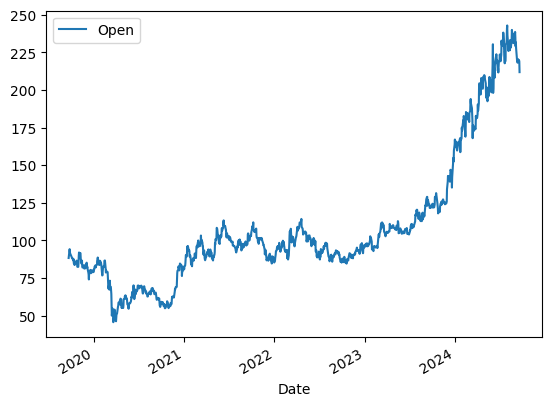

In [ ]:
opn.plot()

In [ ]:
import matplotlib.pyplot as plt
ds=opn.values

In [ ]:
ds

array([[ 88.33333588],
       [ 92.66666412],
       [ 94.19999695],
       ...,
       [219.72000122],
       [219.        ],
       [211.91999817]])

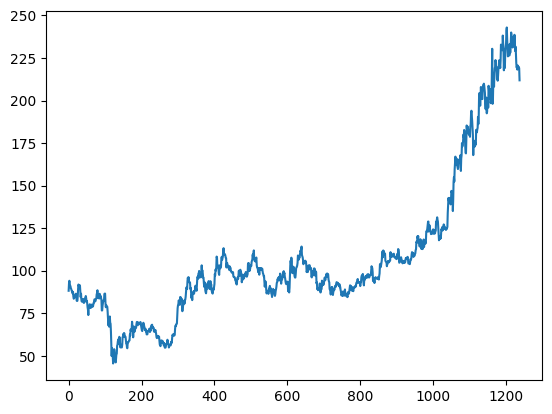

In [ ]:
plt.plot(ds)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
len(ds_scaled), len(ds)

(1, 1238)

In [ ]:
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size


In [ ]:

normalizer = MinMaxScaler(feature_range=(0, 1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1, 1))

# Now calculate the train size
train_size = int(len(ds_scaled) * 0.70)

# Split into training and testing datasets
ds_train, ds_test = ds_scaled[0:train_size, :], ds_scaled[train_size:, :]


In [ ]:
train_size,test_size

(866, 372)

In [ ]:
len(ds_train),len(ds_test)

(866, 372)

In [ ]:
#Creating dataset in time series for LSTM model
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape

((765, 100), (765,))

In [ ]:
X_test.shape, y_test.shape


((271, 100), (271,))

In [ ]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - loss: 0.0242 - val_loss: 0.1196
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.0039 - val_loss: 0.0379
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0022 - val_loss: 0.0522
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 0.0015 - val_loss: 0.0277
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0011 - val_loss: 0.0081
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 9.5459e-04 - val_loss: 0.0050
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 8.2346e-04 - val_loss: 0.0055
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - loss: 7.6673e-04 - val_loss: 0.0057
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - loss: 7.0630e-04 - val_loss: 0.0054
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - loss: 7.4966e-04 - val_loss: 0.0068
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 7.5477e-04 - val_loss: 0.0053
Epoch 12/100
12/

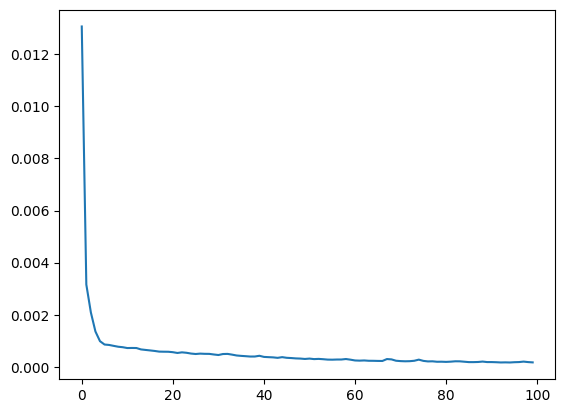

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [ ]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

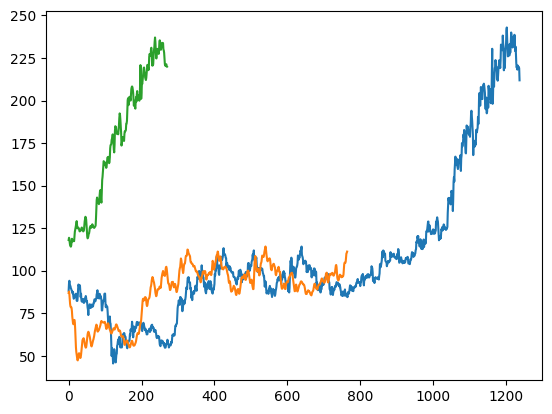

In [ ]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
type(train_predict)

numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))

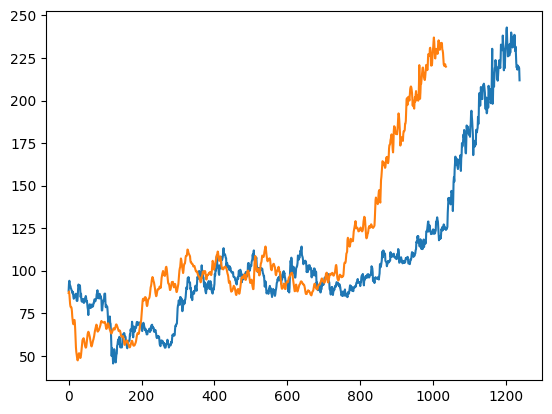

In [ ]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [ ]:
len(ds_test)
#Getting the last 100 days records
fut_inp = ds_test[270:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)

fut_inp.shape

(1, 102)

In [ ]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [ ]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride)
lst_output = []
n_steps = 100
i = 0

while(i < 30):

    if(len(tmp_inp) > 100):
        fut_inp = np.array(tmp_inp[-n_steps:])  # Take the last 100 elements
        fut_inp = fut_inp.reshape((1, n_steps, 1))  # Reshape for prediction
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())  # Add the predicted value
        tmp_inp = tmp_inp[1:]  # Slide the window
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


[[0.8596672415733337], [0.8569938540458679], [0.8586036562919617], [0.8604373335838318], [0.8616777062416077], [0.8620231747627258], [0.861464262008667], [0.8601884841918945], [0.8584694266319275], [0.8565794825553894], [0.8547360897064209], [0.8530749082565308], [0.851651132106781], [0.8504542708396912], [0.8494337797164917], [0.8485224843025208], [0.8476557731628418], [0.8467854857444763], [0.8458831906318665], [0.8449397087097168], [0.8439611196517944], [0.8429610133171082], [0.8419567942619324], [0.8409625291824341], [0.8399897217750549], [0.8390434980392456], [0.8381253480911255], [0.8372330069541931], [0.8363622426986694], [0.8355090022087097]]


In [ ]:
len(ds_scaled)

1238

In [ ]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)


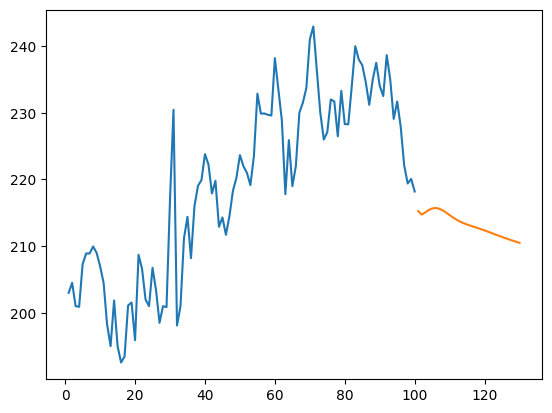

In [ ]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1132:1132+len(plot_new)]))
plt.plot(plot_pred, normalizer.inverse_transform(np.array(lst_output).reshape(-1, 1)))


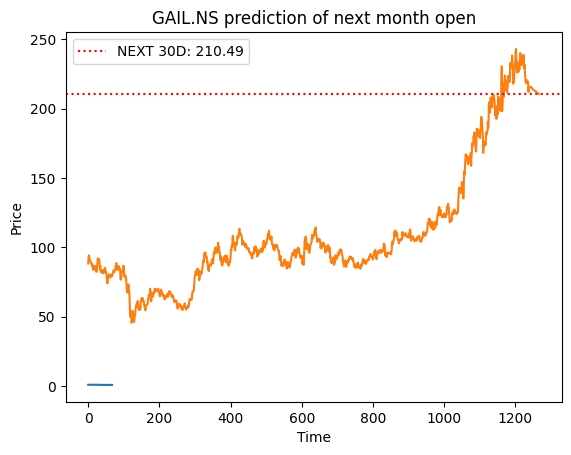

In [ ]:
ds_new = ds_scaled.tolist()
len(ds_new)
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()